# Stanford CME 241 (Winter 2025) - Assignment 2

**Due: Tuesday, February 4 @ 11:59 PM PST on Gradescope.**

Assignment instructions:
- Make sure each of the subquestions have answers
- Ensure that group members indicate which problems they're in charge of
- Show work and walk through your thought process where applicable
- Empty code blocks are for your use, so feel free to create more under each section as needed
- Document code with light comments (i.e. 'this function handles visualization')

Submission instructions:
- When complete, fill out your publicly available GitHub repo file URL and group members below, then export or print this .ipynb file to PDF and upload the PDF to Gradescope.

*Link to this ipynb file in your public GitHub repo (replace below URL with yours):* 

https://github.com/my-username/my-repo/assignment-file-name.ipynb

*Group members (replace below names with people in your group):* 
- Person 1
- Person 2
- Person 3

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1: Job-Hopping and Wages-Utility-Maximization (Led by ______)

You are a worker who starts every day either employed or unemployed. If you start your day employed, you work on your job for the day (one of $n$ jobs, as elaborated later) and you get to earn the wage of the job for the day. However, at the end of the day, you could lose your job with probability $\alpha \in [0,1]$, in which case you start the next day unemployed. If at the end of the day, you do not lose your job (with probability $1-\alpha$), then you will start the next day with the same job (and hence, the same daily wage). 

On the other hand, if you start your day unemployed, then you will be randomly offered one of $n$ jobs with daily wages $w_1, w_2, \ldots w_n \in \mathbb{R}^+$ with respective job-offer probabilities $p_1, p_2, \ldots p_n \in [0,1]$ (with $\sum_{i=1}^n p_i = 1$). You can choose to either accept or decline the offered job. If you accept the job offer, your day progresses exactly like the **employed-day** described above (earning the day's job wage and possibly (with probability $\alpha$) losing the job at the end of the day). However, if you decline the job offer, you spend the day unemployed, receive the unemployment wage $w_0 \in \mathbb{R}^+$ for the day, and start the next day unemployed.

The problem is to identify the optimal choice of accepting or rejecting any of the job offers the worker receives, in a manner that maximizes the infinite-horizon **Expected Discounted-Sum of Wages Utility**. Assume the daily discount factor for wages (employed or unemployed) is $\gamma \in [0,1])$. Assume Wages Utility function to be $U(w) = \log(w)$ for any wage amount $w \in \mathbb{R}^+$. The goal is to maximize:

$$
\mathbb{E}\left[\sum_{u=t}^\infty \gamma^{u-t} \cdot \log(w_{i_u})\right]
$$

at the start of a given day $t$ ($w_{i_u}$ is the wage earned on day $u$, $0 \leq i_u \leq n$ for all $u \geq t$).

---

### Subquestions

#### Part (A): MDP Modeling

Express the job-hopping problem as an MDP using clear mathematical notation by defining the following components:

1. **State Space**: Define the possible states of the MDP.
2. **Action Space**: Specify the actions available to the worker at each state.
3. **Transition Function**: Describe the probabilities of transitioning between states for each action.
4. **Reward Function**: Specify the reward associated with the states and transitions.
5. **Bellman Optimality Equation**: Write the Bellman Optimality Equation customized for this MDP.

---

#### Part (B): Python Implementation

Write Python code that:

1. Solves the Bellman Optimality Equation (hence, solves for the **Optimal Value Function** and the **Optimal Policy**) with a numerical iterative algorithm. 
2. Clearly define the inputs and outputs of your algorithm with their types (`int`, `float`, `List`, `Mapping`, etc.).

*Note*: For this problem, write the algorithm from scratch without using any prebuilt MDP/DP libraries or code.

---

#### Part (C): Visualization and Analysis

1. Plot the **Optimal Value Function** as a function of the state for a specific set of parameters ($n$, $w_1, \ldots, w_n$, $p_1, \ldots, p_n$, $\alpha$, $\gamma$, $w_0$).
2. Include these graphs in your submission.

---

#### Part (D): Observations

1. What patterns do you observe in the **Optimal Policy** as you vary the parameters $n$, $\alpha$, and $\gamma$?
2. Provide a brief discussion of your findings.

---

### Part (A) Answer

<span style="color:red">
State Space: includes unemployed state 0, and all n possible jobs 1, 2, ..., n
$$s = \{0, 1, 2, ..., n\}$$

Action Space: there only two actions for a worker at each state - accept job or reject job. If current state is unemployed, worker can either accept new job or reject. If current state is employed at job i, worker can either continue working job i or reject.
$$
a(s) =
\begin{cases} 
\{ \text{accept new job, reject new job} \} & \text{if } s = 0, \\
\{ \text{continue current job, reject current job} \} & \text{otherwise.}
\end{cases}
$$
Transition Function: the transition function is different for unemployed state compared to any of the n employed states. When s = 0, the worker has equal probability of being offered any job i, which we will define as p_i. When s > 0, there is an alpha probability of losing the job and being unemployed, and a (1 - alpha) probability of staying at job i.

$$
P(s' \mid s, a) =
\begin{cases} 
    p_i, & \text{if } s = 0 \text{ and } a = \text{accept}, \text{ for } s' = i \text{ (job offer accepted)} \\
    1, & \text{if } s = 0 \text{ and } a = \text{decline}, \text{ for } s' = 0 \text{ (unemployment continues)} \\
    \alpha, & \text{if } s = i, i > 0 \text{ (employed)} \text{ for } s' = 0 \text{ (job lost)} \\
    1 - \alpha, & \text{if } s = i, i > 0 \text{ (employed)} \text{ for } s' = i \text{ (job retained)} \\
    0, & \text{otherwise}
\end{cases}
$$

Reward Function: When the worked is unemployed, so s = 0, the reward dependson the action they take for the offered job. If job i is accepted, the worker's reward will be the wage i, corresponding to the job. If the job is declined, they will get wage 0, which is the unemployment benefit. If the worker is employed, so s = i, i > 0, the worker earns the daily wage for that job. Because we are applying a Utility function to reward for the worker, the true reward is log(wage).
$$
R(s, a) =
\begin{cases} 
    log(w_i), & \text{if } s = 0 \text{ and } a = \text{accept} \\
    log(w_i), & \text{if } s = i, i > 0 \\
    log(w_0), & \text{if } s = 0 \text{ and } a = \text{decline} \\
\end{cases}
$$

Bellman Optimality Equation: NEED TO ADD EXPLANATION

$$
V^*(0) = max\Bigg(log(w_0) + \gamma V^*(0), \sum_{i=1}^n p_i (log(w_i) + \gamma V^* (i))    \Bigg)
$$
$$
V^*(i) = log(w_i) + \gamma[\alpha V^*(0) + (1-\alpha)V^*(i)]
$$
To make it easier during the next part, we'll rewrite V(i) by rearranging:
$$
V^*(i) = \frac{log(w_i) + \gamma \alpha V^*(0)}{1 - \gamma(1 - \alpha)}
$$

</span>

### Part (B) Answer

In [8]:
import numpy as np
from typing import List, Tuple, Dict
from scipy.stats import poisson
import matplotlib.pyplot as plt

In [16]:
def solve_mdp_log_utility(
    n: int,
    wages: List[float],
    offer_probs: List[float],
    w0: float,
    alpha: float,
    gamma: float,
    epsilon: float = 1e-6
) -> Tuple[Dict[int, float], Dict[int, str]]:
    """
    Solves the Bellman Optimality Equation for the worker's employment MDP 
    under log utility using value iteration.

    Returns V_optimal (Dict[int, float]) - Optimal value function {state: value}
    and policy_optimal (Dict[int, str]) - Optimal policy {state: action}
    """

    # init V_f for all states
    V = np.zeros(n + 1)  # V[0] unemployed, V[1] to V[n] employed

    while True:
        V_new = np.zeros(n + 1)

        # compute V*(i) for employed states
        for i in range(1, n + 1):
            V_new[i] = (np.log(wages[i - 1]) + gamma * alpha * V[0]) / (1 - gamma * (1 - alpha))

        # compute V*(0) for unemployed state
        accept = sum(offer_probs[i] * (np.log(wages[i]) + gamma * V_new[i + 1]) for i in range(n))
        reject = np.log(w0) + gamma * V[0]

        V_new[0] = max(accept, reject)

        # check convergence
        if np.max(np.abs(V_new - V)) < epsilon:
            break
            
        V = V_new

    # Extract optimal policy
    policy = {}

    # Policy for employed states: Stay in the job if V(i) is optimal
    for i in range(1, n + 1):
        stay_value = V[i]
        leave_value = np.log(w0) + gamma * V[0]
        if stay_value >= leave_value:
            policy[i] = f"stay in job {i}"
        else:
            policy[i] = "quit and become unemployed"

    # Policy for unemployed state: Accept or decline offers based on max value
    if accept > reject:
        best_job = np.argmax(accept) + 1
        policy[0] = f"accept job {best_job}"
    else:
        policy[0] = "decline offers"

    # Convert to dictionary format
    V_optimal = {i: V[i] for i in range(n + 1)}
    policy_optimal = policy

    return V_optimal, policy_optimal

In [28]:
# **Example Usage with 8 Jobs of Equal Offer Probability**
n = 8  # Increased to 8 jobs
wages = [40, 60, 100, 25, 80, 150, 200, 300]  # Varied wages for different jobs
offer_probs = [1 / n] * n  # Equal probability for all job offers
w0 = 50  # Unemployment wage
alpha = 0.15  # Probability of losing a job
gamma = 0.95  # Discount factor

# Solve the MDP
V_opt, policy_opt = solve_mdp_log_utility(n, wages, offer_probs, w0, alpha, gamma)

# Print results
print("Optimal Value Function:")
for state, value in V_opt.items():
    print(f"V({state}) = {value:.4f}")

print("\nOptimal Policy:")
for state, action in policy_opt.items():
    print(f"State {state}: {action}")


Optimal Value Function:
V(0) = 90.0051
V(1) = 85.7901
V(2) = 87.8965
V(3) = 90.5501
V(4) = 83.3486
V(5) = 89.3909
V(6) = 92.6564
V(7) = 94.1509
V(8) = 96.2572

Optimal Policy:
State 1: quit and become unemployed
State 2: quit and become unemployed
State 3: stay in job 3
State 4: quit and become unemployed
State 5: quit and become unemployed
State 6: stay in job 6
State 7: stay in job 7
State 8: stay in job 8
State 0: accept job 1


### Part (C) Answer

<span style="color:red">*fill in*</span>

In [33]:
import matplotlib.pyplot as plt

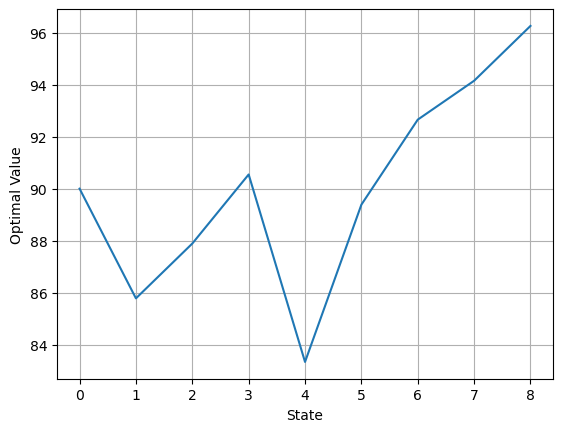

In [37]:
plt.plot(V_opt.keys(), V_opt.values())
plt.xlabel("State")
plt.ylabel("Optimal Value")
plt.grid(True)
plt.show()

### Part (D) Answer

<span style="color:red">*fill in*</span>

## Question 2: Two-Stores Inventory Control (Led by Benjamin)

We extend the capacity-constrained inventory example implemented in [rl/chapter3/simple_inventory_mdp_cap.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/chapter3/simple_inventory_mdp_cap.py) as a `FiniteMarkovDecisionProcess` (the Finite MDP model for the capacity-constrained inventory example is described in detail in Chapters 1 and 2 of the RLForFinanceBook). Here we assume that we have two different stores, each with their own separate capacities $C_1$ and $C_2$, their own separate Poisson probability distributions of demand (with means $\lambda_1$ and $\lambda_2$), their own separate holding costs $h_1$ and $h_2$, and their own separate stockout costs $p_1$ and $p_2$. At 6pm upon stores closing each evening, each store can choose to order inventory from a common supplier (as usual, ordered inventory will arrive at the store 36 hours later). We are also allowed to transfer inventory from one store to another, and any such transfer happens overnight, i.e., will arrive by 6am next morning (since the stores are fairly close to each other). Note that the orders are constrained such that following the orders on each evening, each store's inventory position (sum of on-hand inventory and on-order inventory) cannot exceed the store's capacity (this means the action space is constrained to be finite). Each order made to the supplier incurs a fixed transportation cost of $K_1$ (fixed-cost means the cost is the same no matter how many units of non-zero inventory a particular store orders). Moving any non-zero inventory between the two stores incurs a fixed transportation cost of $K_2$. 

Model this as a derived class of `FiniteMarkovDecisionProcess` much like we did for `SimpleInventoryMDPCap` in the code repo. Set up instances of this derived class for different choices of the problem parameters (capacities, costs etc.), and determine the Optimal Value Function and Optimal Policy by invoking the function `value_iteration` (or `policy_iteration`) from file [rl/dynamic_programming.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/dynamic_programming.py).

Analyze the obtained Optimal Policy and verify that it makes intuitive sense as a function of the problem parameters.

In [8]:
import sys
sys.path.append("/Users/benjaminzaidel/Desktop//RL-book/")

In [12]:
from dataclasses import dataclass
from typing import Tuple, Dict, Mapping
from rl.markov_decision_process import FiniteMarkovDecisionProcess
from rl.policy import FiniteDeterministicPolicy
from rl.markov_process import FiniteMarkovProcess, FiniteMarkovRewardProcess
from rl.distribution import Categorical
from scipy.stats import poisson

In [15]:
# two_store_mdp.py

@dataclass(frozen=True)
class InventoryState:
    on_hand: int
    on_order: int

    def inventory_position(self) -> int:
        return self.on_hand + self.on_order


InvOrderMapping = Mapping[
    InventoryState,
    Mapping[int, Categorical[Tuple[InventoryState, float]]]
]


def get_action_transition_reward_map(self) -> InvOrderMapping:
    d: Dict[InventoryState, Dict[int, Categorical[Tuple[InventoryState,
                                                        float]]]] = {}

    # Iterate through all possible state combinations for both stores
    for alpha1 in range(self.capacity1 + 1):
        for beta1 in range(self.capacity1 + 1 - alpha1):
            for alpha2 in range(self.capacity2 + 1):
                for beta2 in range(self.capacity2 + 1 - alpha2):
                    state = InventoryState(alpha1, beta1, alpha2, beta2)
                    ip1: int = state.inventory_position_1()
                    ip2: int = state.inventory_position_2()
                    
                    # Base reward includes holding costs for both stores
                    base_reward: float = -(self.holding_cost1 * alpha1 + 
                                         self.holding_cost2 * alpha2)
                    
                    d1: Dict[int, Categorical[Tuple[InventoryState, float]]] = {}

                    # For store 1's possible orders
                    for order1 in range(self.capacity1 - ip1 + 1):
                        # For store 2's possible orders
                        for order2 in range(self.capacity2 - ip2 + 1):
                            # For possible transfers (-max_2to1 to max_1to2)
                            max_1to2 = min(alpha1, self.capacity2 - ip2)
                            max_2to1 = min(alpha2, self.capacity1 - ip1)
                            
                            for transfer in range(-max_2to1, max_1to2 + 1):
                                # Adjust inventory positions after transfer
                                adj_ip1 = ip1 - max(0, transfer) + min(0, transfer)
                                adj_ip2 = ip2 + max(0, transfer) - min(0, transfer)
                                
                                # Dictionary for state-reward probabilities
                                sr_probs_dict: Dict[Tuple[InventoryState, float], float] = {}
                                
                                # Calculate transportation costs
                                transport_cost = 0.0
                                if order1 > 0 or order2 > 0:
                                    transport_cost -= self.transportationcost1
                                if transfer != 0:
                                    transport_cost -= self.transportationcost2

                                # Calculate transition probabilities for all possible demands
                                for d1 in range(adj_ip1 + 1):
                                    for d2 in range(adj_ip2 + 1):
                                        prob = (self.poisson_distr1.pmf(d1) * 
                                               self.poisson_distr2.pmf(d2))
                                        
                                        if prob > 0.0001:  # Ignore tiny probabilities
                                            sr_probs_dict[(
                                                InventoryState(
                                                    adj_ip1 - d1, order1,
                                                    adj_ip2 - d2, order2
                                                ),
                                                base_reward + transport_cost
                                            )] = prob

                                # Handle stockout cases
                                prob1 = 1 - self.poisson_distr1.cdf(adj_ip1 - 1)
                                prob2 = 1 - self.poisson_distr2.cdf(adj_ip2 - 1)
                                
                                if prob1 > 0 or prob2 > 0:
                                    stockout_reward = base_reward + transport_cost
                                    
                                    # Add stockout costs using the original formula for each store
                                    if prob1 > 0:
                                        stockout_reward -= self.stockout_cost1 * (
                                            self.poisson_lambda1 - adj_ip1 * 
                                            (1 - self.poisson_distr1.pmf(adj_ip1) / prob1)
                                        )
                                    if prob2 > 0:
                                        stockout_reward -= self.stockout_cost2 * (
                                            self.poisson_lambda2 - adj_ip2 * 
                                            (1 - self.poisson_distr2.pmf(adj_ip2) / prob2)
                                        )
                                    
                                    sr_probs_dict[(
                                        InventoryState(0, order1, 0, order2),
                                        stockout_reward
                                    )] = prob1 * prob2

                                # Create categorical distribution for this action
                                action_key = (order1, order2, transfer)
                                d1[action_key] = Categorical(sr_probs_dict)

                    d[state] = d1
    return d

if __name__ == '__main__':
    from pprint import pprint

    # Parameters for both stores
    user_capacity1 = 2
    user_capacity2 = 2
    user_poisson_lambda1 = 1.0
    user_poisson_lambda2 = 1.0
    user_holding_cost1 = 1.0
    user_holding_cost2 = 1.0
    user_stockout_cost1 = 10.0
    user_stockout_cost2 = 10.0
    user_transportation_cost1 = 2.0
    user_transportation_cost2 = 1.0

    user_gamma = 0.9

    # Create MDP instance
    si_mdp = SimpleInventoryMDPCap(
        capacity1=user_capacity1,
        capacity2=user_capacity2,
        poisson_lambda1=user_poisson_lambda1,
        poisson_lambda2=user_poisson_lambda2,
        holding_cost1=user_holding_cost1,
        holding_cost2=user_holding_cost2,
        stockout_cost1=user_stockout_cost1,
        stockout_cost2=user_stockout_cost2,
        transportationcost1=user_transportation_cost1,
        transportationcost2=user_transportation_cost2
    )

    # Rest of the main section remains the same as original
    print("MDP Transition Map")
    print("------------------")
    print(si_mdp)

    fdp: FiniteDeterministicPolicy[InventoryState, int] = \
        FiniteDeterministicPolicy(
            {InventoryState(alpha, beta): user_capacity - (alpha + beta)
             for alpha in range(user_capacity + 1)
             for beta in range(user_capacity + 1 - alpha)}
    )

    print("Deterministic Policy Map")
    print("------------------------")
    print(fdp)

    implied_mrp: FiniteMarkovRewardProcess[InventoryState] =\
        si_mdp.apply_finite_policy(fdp)
    print("Implied MP Transition Map")
    print("--------------")
    print(FiniteMarkovProcess(
        {s.state: Categorical({s1.state: p for s1, p in v.table().items()})
         for s, v in implied_mrp.transition_map.items()}
    ))

    print("Implied MRP Transition Reward Map")
    print("---------------------")
    print(implied_mrp)

    print("Implied MP Stationary Distribution")
    print("-----------------------")
    implied_mrp.display_stationary_distribution()
    print()

    print("Implied MRP Reward Function")
    print("---------------")
    implied_mrp.display_reward_function()
    print()

    print("Implied MRP Value Function")
    print("--------------")
    implied_mrp.display_value_function(gamma=user_gamma)
    print()

    from rl.dynamic_programming import evaluate_mrp_result
    from rl.dynamic_programming import policy_iteration_result
    from rl.dynamic_programming import value_iteration_result

    print("Implied MRP Policy Evaluation Value Function")
    print("--------------")
    pprint(evaluate_mrp_result(implied_mrp, gamma=user_gamma))
    print()

    print("MDP Policy Iteration Optimal Value Function and Optimal Policy")
    print("--------------")
    opt_vf_pi, opt_policy_pi = policy_iteration_result(
        si_mdp,
        gamma=user_gamma
    )
    pprint(opt_vf_pi)
    print(opt_policy_pi)
    print()

    print("MDP Value Iteration Optimal Value Function and Optimal Policy")
    print("--------------")
    opt_vf_vi, opt_policy_vi = value_iteration_result(si_mdp, gamma=user_gamma)
    pprint(opt_vf_vi)
    print(opt_policy_vi)
    print()

MDP Transition Map
------------------
From State InventoryState(on_hand=0, on_order=0):
  With Action 0:
    To [State InventoryState(on_hand=0, on_order=0) and Reward -10.000] with Probability 1.000
  With Action 1:
    To [State InventoryState(on_hand=0, on_order=1) and Reward -12.000] with Probability 1.000
  With Action 2:
    To [State InventoryState(on_hand=0, on_order=2) and Reward -12.000] with Probability 1.000
From State InventoryState(on_hand=0, on_order=1):
  With Action 0:
    To [State InventoryState(on_hand=1, on_order=0) and Reward -0.000] with Probability 0.368
    To [State InventoryState(on_hand=0, on_order=0) and Reward -5.820] with Probability 0.632
  With Action 1:
    To [State InventoryState(on_hand=1, on_order=1) and Reward -2.000] with Probability 0.368
    To [State InventoryState(on_hand=0, on_order=1) and Reward -7.820] with Probability 0.632
From State InventoryState(on_hand=0, on_order=2):
  With Action 0:
    To [State InventoryState(on_hand=2, on_order=

### Question 3: Dynamic Price Optimization (Led by ______)

You own a supermarket, and you are $T$ days away from Halloween 🎃. You have just received $M$ Halloween masks from your supplier. You want to dynamically set the selling price of the Halloween masks at the start of each day in a manner that maximizes your **Expected Total Sales Revenue** for Halloween masks this season (assume no one will buy Halloween masks after Halloween).

Assume that for each of the $T$ days, you are required to select a price for that day from one of $N$ prices $p_1, p_2, \dots, p_N \in \mathbb{R}$, and that price is the selling price for all masks on that day. Assume that the customer demand for the number of Halloween masks on any day is governed by a Poisson probability distribution with mean $\lambda_i \in \mathbb{R}$ if you select that day’s price to be $p_i$ (where $i$ is a choice among $1, 2, \dots, N$).

Note that on any given day, the demand could exceed the number of Halloween masks you have in the store, in which case the number of masks sold on that day will be equal to the number of Halloween masks you had at the start of that day.

We spoke about this example in class - referencing the slides here (if needed) could be helpful!

---

### Subquestions

#### Part (A): Bellman Optimality Equation

Write the **Bellman Optimality Equation** customized to this Markov Decision Process (MDP). Essentially, you need to express the **Optimal Value Function** $v_*$ recursively based on taking the best action in the current state and based on the subsequent random customer demand that would produce the appropriate reward and take you to the next state.

**Note**: The probability mass function of a Poisson distribution with mean $\lambda \in \mathbb{R}$ is given by:

$$
f(k) = \frac{e^{-\lambda} \lambda^k}{k!}, \quad k = 0, 1, 2, \dots
$$

---

#### Part (B): Boundary Conditions

To be able to solve the $v_*$ recursion, you need to know the values of $v_*$ for the boundary case (boundary states). Write down the boundary case(s) for the $v_*$ recursion.

---

#### Part (C): Numerical Solution

You can solve this $v_*$ recursion (hence, solve for the **Optimal Policy** $\pi_*$) with a numerical recursive algorithm (essentially a special form of Dynamic Programming algorithm customized to this problem). 

Write Python code for this algorithm that would enable you to dynamically set the selling price at the start of each day. Clearly define the inputs and outputs of your algorithm with their types (`int`, `float`, `List`, `Mapping`, etc.).

---


### Part (A) Answer

<span style="color:red">

#### State space: 

The state space in the context of this question will be the days before halloween, t and the inventory of masks, m. 

$t \in \{0,1,...,T\} $ and $m \in  \{0,1,...,M\}$

We will denote the state in this case by:

$s(t,m)$

#### Action space:

At any state s(t,m) with t >= 1 and m > 0, the decision is about which price to set for that day. The set of available actions are:

$A = {p_1, ..., p_N}$

Where each price $p_i$ is associated with a poisson distribution with mean, $\lambda_i$.

#### Transition dynamics

Assume the demand (number of customers) is defined as k on a random day that follows the poisson distribution shown in the question. 

Some cases to consider is that you could sell at most the available inventory, so it will be defined as $min{m,k}$

Also, to define the next state, we will update the inventory as $m - min\{m,k\}$. This will make the next state as $s(t-1, m-min\{m,k\})$

#### Reward functions

The immediate reward (the revenue in this case) on a day is: 
$$
Reward_{immediate} = p_i \cdot min\{m,k\}
$$ 
There is no other costs involved or discounting.


#### Bellmen optimality equation:
The goal is to maximize the total expected revenue over the remaining days till halloween. Let $v^* (t,m)$ denote the max expected revenue you could achieve from state $s(t,m)$. 

At any state $s(t,m)$ with t >= 1, you choose an action, $p_i$ and then have a random demand, k. The immediate revenue plus the optimal future revenue is: 
$p_i \cdot min\{m, k\} + v^* (t-1,m-min\{m,k \})$

Now putting everything together by maximizing the above equation to formulate the Bellman optimality equation, we get the following expression:

$$
v^*(m, t) = \max_{i \in \{1, \dots, N\}} \Bigg\{ 
\sum_{k=0}^{\infty} 
\frac{e^{-\lambda_i} \lambda_i^k}{k!} \cdot
[ 
 p_i \cdot min(m, k) +
 v^*(m - min(m, k), t-1)
]  
\Bigg\}.
$$



</span>

### Part (B) Answer

<span style="color:red">
The boundary condition for this problem would be at the terminal states, from the following:

BC:

The condition when it has past halloween:

$V^*_t(0,m) = 0$ for all m >= 0

The condition when all masks have been sold out before Halloween:

$V^*_t(t,0) = 0$ for all t >= 0

</span>

### Part (C) Answer

In [1]:
def solve_halloween_problem(
    T: int,
    M: int,
    prices: list[float],
    lambdas: list[float],
) -> Tuple[float, List[List[int]]]:
    """
    Computes the maximum expected revenue and the optimal pricing policy.

    Args:
        T (int): Number of days remaining until Halloween.
        M (int): Number of Halloween masks available.
        prices (List[float]): List of possible prices [p_1, p_2, ..., p_N].
        lambdas (List[float]): List of corresponding Poisson means [λ1, λ2, ..., λN].

    Return:
        max_expected_revenue (float): Maximum expected total revenue achievable given T days and M masks.
        optimal_policy (List[List[int]]): A 2D list with dimensions (T+1) x (M+1) where
            optimal_policy[t][m] is the index (0-based indexed) of the optimal price to set with
            t days remaining and m masks available.
    """
    N = len(prices)
    # Define the state space as a table 
    state_space = np.zeros((T + 1, M + 1))
    policy = np.zeros((T + 1, M + 1), dtype=int)

    # Begin the backward induction problem
    for t in range(1, T+1):
        for m in range(1, M+1):
            best_val = -float('inf')
            best_price = None

            # Consider the price for each option
            for i in range(N):
                price = prices[i]
                lam = lambdas[i]
                expected_val = 0
                # Calculate where the demand, k < m
                k_vals = np.arange(m)
                pmf_val = poisson.pmf(k_vals, lam)
                remain_inven = m - k_vals

                # Determine the next day state
                future_state = state_space[t-1][remain_inven]
                
                # Find the reward for the current day
                reward = price * k_vals + future_state

                # Find the expected value
                expected_val = np.sum(pmf_val * reward)

                # Calculate where the demand, k >= m
                prob = 1 - np.sum(pmf_val)

                # Update the expected val with the case of k >= m
                expected_val += prob * price * m

                # Determine the best action for the current state
                if expected_val > best_val:
                    best_val = expected_val
                    best_price = i
                
            # Store the best price in the state and policy
            state_space[t][m] = best_val
            policy[t][m] = best_price

    # Determine the optimal revenue after the iterations 
    max_revenue = state_space[T][M]
    return max_revenue, policy

# Example usage:
if __name__ == "__main__":
    # Problem parameters:
    # Number of days till Halloween.
    T = 10              
    # Total number of Masks available.
    M = 20
    # List of potential prices.
    prices = [10.0, 15.0, 20.0]  
    # Corresponding poisson mean for each price.
    lambdas = [5.0, 3.0, 1.0]    
    
    max_revenue, optimal_policy = solve_halloween_problem(T, M, prices, lambdas)
    
    print("Maximum Expected Revenue: $", round(max_revenue, 2))
    # Use AI to assist with generating the plot.
    policy_prices = np.empty((M, T))
    for t in range(1, T + 1):
        for m in range(1, M + 1):
            action = optimal_policy[t][m]
            policy_prices[m-1, t-1] = prices[action]
    
    plt.figure(figsize=(10, 6))
    # origin='lower' means the smallest number of masks is at the bottom.
    heatmap = plt.imshow(policy_prices, cmap='viridis', aspect='auto', origin='lower')
    plt.colorbar(heatmap, label='Optimal Price ($)')
    plt.xlabel('Days Remaining (t)')
    plt.ylabel('Masks Available (m)')
    plt.title('Optimal Pricing Policy Heatmap')
    plt.xticks(np.arange(0, T, step=1), np.arange(1, T+1, step=1))
    plt.yticks(np.arange(0, M, step=2), np.arange(1, M+1, step=2))
    plt.show()

ModuleNotFoundError: No module named 'numpy'

## Question 4: Risk-Aversion and Utility Optimization under CARA Utility (Led by ______)

You are tasked with analyzing the behavior of an investor who seeks to maximize their utility under **CARA Utility**. The investor has wealth $W$ and the CARA utility function:

$$
U(W) = \frac{1 - e^{-aW}}{a}, \quad a > 0,
$$

where $a$ represents the investor's **risk aversion**.

The investor allocates their wealth between:
1. A **riskless asset** with a fixed return $r$, and
2. A **risky asset** with return $R \sim \mathcal{N}(\mu, \sigma^2)$

The investor allocates a fraction $\pi$ of their wealth to the risky asset and $(1 - \pi)$ to the riskless asset. The wealth $W$ after one year is given by:

$$
W = (1 + r)(1 - \pi) + (1 + R)\pi.
$$

The goal is to analyze the investor’s optimal allocation $\pi$ to the risky asset and compute key risk-related quantities.

---

### Subquestions

#### Part (A): Expected Utility and Certainty-Equivalent Wealth

1. Derive the expression for the **expected utility** $\mathbb{E}[U(W)]$, using the given CARA utility function and assuming $R \sim \mathcal{N}(\mu, \sigma^2)$.
2. Using a Taylor expansion, approximate the **certainty-equivalent wealth** $W_{CE}$ up to second-order terms.

---

#### Part (B): Optimal Portfolio Allocation

Derive the optimal fraction $\pi^*$ of wealth to be allocated to the risky asset such that the **expected utility** $\mathbb{E}[U(W)]$ is maximized. Express $\pi^*$ in terms of $a$, $\mu$, $r$, and $\sigma^2$.

---

#### Part (C): Risk Premium

1. Using the results from Part (A), calculate the **absolute risk premium** $\pi_A = \mathbb{E}[W] - W_{CE}$.
2. Verify that $\pi_A \approx \frac{a \pi^2 \sigma^2}{2}$ for small $\sigma^2$.

---

#### Part (D): Numerical Calculations and Interpretation

Given the parameters $r = 0.02$, $\mu = 0.08$, $\sigma^2 = 0.04$, and $a = 3$:
1. Compute the optimal allocation $\pi^*$.
2. Calculate the certainty-equivalent wealth $W_{CE}$.
3. Compute the absolute risk premium $\pi_A$.
4. Interpret the results and discuss how changes in $a$ and $\sigma^2$ affect the risk premium and portfolio allocation.

---

#### Part (E): Expected Utility under Uniform Distribution

Now assume that the return of the risky asset, $R$, is no longer normally distributed. Instead, $R \sim \text{Uniform}[\alpha, \beta]$, where $\alpha$ and $\beta$ are the lower and upper bounds of the distribution, respectively.

1. Derive the new expression for the **expected utility** $\mathbb{E}[U(W)]$. Make sure to simplify your result as much as possible, and ensure that it explicitly depends on $a$, $\pi$, $\alpha$, $\beta$, and $r$.

**Hint**: Use the fact that if $W \sim \text{Uniform}[w_{\text{min}}, w_{\text{max}}]$, then:

$$
\mathbb{E}[g(W)] = \frac{1}{w_{\text{max}} - w_{\text{min}}} \int_{w_{\text{min}}}^{w_{\text{max}}} g(W) \, dW.
$$

---

### Part (A) Answer

<span style="color:red">

#### 1. Expected utility 

Using the given information from the question, the wealth, W expression could be simplified as:

$$
W = (1+r) + \pi (R-r)
$$

where $R\sim N(\mu,\sigma^2)$ The wealth distribution will follow a normal distribution as:

$$
W \sim N((1+r)+\pi(u-r),\pi^2\sigma^2)
$$

The expected utility (obtained from the slides):

$$
\mathbb{E}[U(W)] = \frac{1 - \mathbb{E}[e^{-a W}]}{a}
$$

The general moment-generating function of a normal variable \( X \sim \mathcal{N}(\mu_X, \sigma_X^2) \) is expressed as:

$$
\mathbb{E}[e^{tX}] = e^{t\mu_X + \frac{1}{2} t^2 \sigma_X^2}
$$

Using the above equation we could sub \( t = -a \) to get:

$$
\mathbb{E}[e^{-a W}] = e^{-a[(1+r) + \pi(\mu - r)] + \frac{1}{2} a^2 \pi^2 \sigma^2}
$$

Thus, using the above expression we could obtain the final expected utility as:

$$
\mathbb{E}[U(W)] = \frac{1 - \exp \left( -a \left[(1 + r) + \pi(\mu - r)\right] + \frac{1}{2} a^2 \pi^2 \sigma^2 \right)}{a}
$$

#### 2. Certainty-Equivalent Wealth:

The CE wealth $W_{CE}$ is defined as the level of wealth and when evaluated with the utility function, will provide the same utility as the expected utility.

$$
U(W_{CE}) = E[U(W)]
$$

Using the expressions from above we get:

$$
\frac{1 - e^{-a W_{CE}}}{a} = \frac{1 - \exp \left\{ -a(1 + r) - a\pi(\mu - r) + \frac{1}{2} a^2 \pi^2 \sigma^2 \right\} }{a}
$$

We could simplify the equation to the following: 

$$
e^{-a W_{CE}} = e^{ -a(1 + r) - a\pi(\mu - r) + \frac{1}{2} a^2 \pi^2 \sigma^2}
$$

Taking logarithms on both sides, we obtain the following:

$$
-a W_{CE} = -a(1 + r) - a\pi(\mu - r) + \frac{1}{2} a^2 \pi^2 \sigma^2
$$

and then dividing through by $-a$ (given that $a > 0$) will simplify the expression to:

$$
W_{CE} = (1 + r) + \pi(\mu - r) - \frac{1}{2} a \pi^2 \sigma^2
$$

Using the taylor expansion, the certainty equivalent can be approximated by (following the slides):

$$
W_{CE} \approx \mathbb{E}[W] - \frac{a}{2} \operatorname{Var}(W)
$$

Since we have expected value of W as:

$$
\mathbb{E}[W] = (1 + r) + \pi(\mu - r)
$$

and the variance of W is:

$$
\operatorname{Var}(W) = \pi^2 \sigma^2
$$

Thus putting everything together we obtain:,

$$
W_{CE} \approx (1 + r) + \pi(\mu - r) - \frac{a}{2} \pi^2 \sigma^2
$$

which matches the expression derived above.


</span>

### Part (B) Answer

<span style="color:red">

From part A, we have the expression of $W_{CE}$ which we will maximize to get the maximized expected utility. To find the optimal $\pi^*$ that maximizes $W_{CE}$, we find the derivative of $W_{CE}$ with respect to $\pi$ and set it equal to zero:

$$
\frac{dW_{CE}}{d\pi} = (\mu - r) - a\pi\sigma^2 = 0
$$

Rearrange for $\pi$, we get:

$$
\pi^* = \frac{\mu - r}{a\sigma^2}
$$

The above equation provides the optimal fraction of wealth to be allocated to the risky asset. The expression shows allocation of risky asset increases with risk premium (u-r) and decreases with both the investor's risk aversion, a and the investment's variance, $\sigma^2$.
</span>

### Part (C) Answer

<span style="color:red">

#### 1. Absolute Risk Premium:
The absolute risk premium is $\pi_A = E[W] - W_{CE}$.

The expected wealth is defined as:
$$
E[W] = (1 + r) + \pi (u - r)
$$

The CE of wealth from part A is:
$$
W_{CE} = (1 + r) + \pi(\mu - r) - \frac{a}{2} \pi^2 \sigma^2
$$

Now putting it into the expression of $\pi_A$ and simplify it, we obtain:
$$
\frac{1}{2} a \pi^2 \sigma^2
$$

#### 2. Verification for small $\sigma^2$:
For small $\sigma^2$, the taylor series expansion used in the approximation of CE of wealth is accurate (the higher-order terms are negligible), as shown in part 1 of the question. Thus, the following approximation holds:
$$
\pi_A \approx \frac{a \pi^2 \sigma^2}{2}
$$

</span>

### Part (D) Answer

<span style="color:red">

#### 1. Find $\pi^*$:

$$
\pi^* = \frac{0.08-0.02}{3*0.04} = \frac{1}{2} 
$$

#### 2. Find $W_{CE}$:

$$
W_{CE} = (1 + r) + \pi(\mu - r) - \frac{a}{2} \pi^2 \sigma^2
$$

$$
W_{CE} = (1 + 0.02) + \frac{1}{2} \cdot(0.08 - 0.02) - \frac{3}{2} \cdot \frac{1}{4} \cdot 0.04 = 1.035 
$$

#### 3. Find $\pi_{A}$:
$$
\pi_A = \frac{1}{2} a \pi^2 \sigma^2
$$

$$
\pi_A = \frac{1}{2} \cdot 3 \cdot \frac{1}{4} \cdot 0.04 = 0.015
$$


#### 4. Interpret the results:
The $\pi^*$ indicates the investor allocates 50% towards the risky based asset based on the risk preimum (excess return) and risk (from risk aversion, a and stock variance). 

The CE of wealth (1.035) is lower than the expected wealth of 1.05 due to the risk penalty.

The absolute risk premium of 0.015 helps quantify the cost of risk to the investor.

Higher risk aversion or vairance would lead to a lower allocation to risky assets (also increases the absolute risk premium), where the investor is risk averse (wants to avoid risk). 

</span>

### Part (E) Answer

<span style="color:red">

Now we are given that, R is uniformly distributed ($R \sim \text{Uniform}[\alpha, \beta]$), with $\alpha$ and $\beta$ are the lower and upper bounds respectively. Now, we will find the new expression of the expected utility $\mathbb{E}[U(W)]$. 

List the given information:

Utility function $U(W) = \frac{1-e^{-aW}}{a}$

Investor wealth, $W = (1+r) + (R-r) \pi$

Subsititute the above two equations into the expression of the expected utility that is uniformly distributed, we get:

$$
\mathbb{E}[U(W)] = \frac{1}{\beta - \alpha} \int_{\beta}^{\alpha} \frac{1-e^{-aW}}{a} dR
$$

Simplify the expression before integrating the formula we get:

$$
\mathbb{E}[U(W)] = \frac{1}{a(\beta - \alpha)} \int_{\beta}^{\alpha} 1-e^{-a[(1+r)+ (R-r)\pi]} dR
$$

Now take the integral to obtain the following:

$$
\mathbb{E}[U(W)] = \frac{1}{a(\beta - \alpha)} [R + \frac{1}{a\pi} e^{-a[(1+r)+ (R-r)\pi]}]^{\beta}_\alpha
$$

Solving the integral we get:

$$
\mathbb{E}[U(W)] = \frac{1}{a(\beta - \alpha)} [\beta - \alpha + \frac{1}{a\pi} e^{-a(1+r-r\pi)}(e^{-a\beta \pi} - e^{-a \alpha \pi})]
$$

Simplify the expression, we could get:

$$
\mathbb{E}[U(W)] = \frac{1}{a} [1 + \frac{e^{-a(1+r-r\pi)}}{a\pi(\beta - \alpha)} (e^{-a\beta \pi} - e^{-a \alpha \pi})]
$$

</span>

### Part (A) Answer

<span style="color:red">

The state vector, $\mathbf{h}(t) = [h_1(t), h_2(t), \dots, h_N(t)]$, where $N$ is the number of animals, represents the current hunger levels at time t. From timestep to time step, we expect the hunger for each animal to increase or decrease according to the below state transition function:  $$
     h_i(t+1) = \max(0, h_i(t) + \gamma - \delta f_i(t)),
     $$
In plain speak, for each animal, the next hunger level depends on three factors: their current hunger ($h_i(t)$), the natural increase in hunger ($\gamma$), and how much the feeding reduces hunger ($\delta f_i(t)$). If the feeding effect ($\delta f_i(t)$) is larger than the sum of current hunger and natural increase ($h_i(t) + \gamma$), the animal's hunger will decrease. Conversely, if the feeding effect is smaller than this sum, the hunger will increase. The max function ensures hunger levels stay non-negative, reflecting the biological reality that an animal can't be 'less than fully satisfied' - at best, they can be completely satiated (hunger = 0).
</span>

### Part (B) Answer

<span style="color:red">

Assume specific food allocations $\mathbf{f}(t) = [f_1, f_2, f_3]$ for $N=3$.

$$
r(\mathbf{h}(t), \mathbf{f}(t)) = \sum_{i=1}^3 \log(1 + f_i(t)).
$$

Expanding:
$$
r(\mathbf{h}(t), \mathbf{f}(t)) = \log(1 + f_1(t)) + \log(1 + f_2(t)) + \log(1 + f_3(t))
$$

This reward function captures the total satisfaction across all three animals, where each animal's individual satisfaction increases logarithmically with the amount of food it receives. The logarithmic form reflects diminishing returns - each additional unit of food provides less additional satisfaction than the previous unit. For example, if we allocated food as $\mathbf{f}(t) = [2,1,3]$, the total reward would be:
$$
r(\mathbf{h}(t), [2,1,3]) = \log(3) + \log(2) + \log(4)
$$

</span>

### Part (C) Answer

<span style="color:red">

The value function V(h(t)) is approximated using a linear combination of features extracted from the state:
$$V(\mathbf{h}(t); \mathbf{w}) = \mathbf{w}^\top \phi(\mathbf{h}(t))$$
In our zoo feeding problem, useful features φ(h(t)) might include:

Average hunger across all animals: $\phi_1(\mathbf{h}(t)) = \frac{1}{N}\sum_{i=1}^N h_i(t) \newline$
Maximum hunger level: $\phi_2(\mathbf{h}(t)) = \max_i h_i(t) \newline$
Hunger variance: $\phi_3(\mathbf{h}(t)) = \frac{1}{N}\sum_{i=1}^N (h_i(t) - \phi_1(\mathbf{h}(t)))^2 \newline$

These features must be normalized before being used in the approximation. Normalization is crucial for two key reasons:

Feature Scale Balancing: Without normalization, features operating on different scales would unfairly influence the learning process. For example, variance (which could be large) might dominate average hunger (which could be smaller) in the weight updates, even if average hunger is actually more important for predicting future rewards.

Numerical Stability: When features have very different magnitudes, we risk numerical overflow or underflow during computation, particularly when calculating gradients for weight updates.

If we didn't normalize features, the learning algorithm would likely:

- Assign disproportionate weights to features with larger scales
- Converge more slowly or fail to converge at all due to numerical instabilities
- Produce a less robust and less generalizable value function approximation

This normalization ensures our approximation learns the true relative importance of each feature rather than being biased by their numerical scales.

</span>

### Part (D) Answer

In [21]:
N = 3  # Number of animals
T = 10  # Time horizon
F = 10  # Total food available per time step
gamma = 1  # Hunger growth rate
delta = 0.5  # Feeding efficiency
alpha = 0.01  # Learning rate
regLambda = 0.01  # Regularization coefficient

# Feature function: Normalize hunger levels
def features(hunger_levels):
    norm_hunger = hunger_levels / (np.max(hunger_levels) + 1e-5)  # Normalize hunger levels
    return np.array([1] + list(norm_hunger))  # Add bias term

# Reward function
def reward(food_allocation):
    """Compute reward as the sum of logarithmic satisfaction."""
    reward = np.sum(np.log(1+food_allocation))
    return reward

# State transition function
def next_hunger(hunger_levels, food_allocation):
    """Compute next hunger levels based on current state and action."""
    next_hunger = np.maximum(0, hunger_levels + gamma -delta * food_allocation)
    return next_hunger

# Bellman update with regularization
def bellman_update(states, actions, next_states, rewards, weights):
    """Perform one step of Bellman update for function approximation."""
    for s, a, ns, r in zip(states, actions, next_states, rewards):
        phi_s = features(s)
        phi_ns = features(ns)
        td_error = r + np.dot(weights, phi_ns) - np.dot(weights, phi_s)
        # use the update rule from the slides (regularized update)
        # will follow this form: weights += _ * _ * _ - regLambda * weights
        weights += alpha*td_error*phi_s -regLambda * weights
    return weights

# ADP Training
def approximate_dynamic_programming(num_episodes=100):
    global weights
    weights = np.zeros(len(features(np.zeros(N))))  # Initialize weights
    episode_rewards = []  # Track cumulative rewards per episode
    weights_history = []  # Track weights over episodes

    for episode in range(num_episodes):
        hunger_levels = np.zeros(N)  # Initial state
        total_reward = 0

        for t in range(T):
            # Sample a random action: Food allocation
            food_allocation = np.random.uniform(0, F, size=N)
            food_allocation = food_allocation / np.sum(food_allocation) * F

            # Calculate reward and next state
            r = reward(food_allocation)
            next_hunger_levels = next_hunger(hunger_levels, food_allocation)

            # Bellman update
            weights = bellman_update(
                [hunger_levels],
                [food_allocation],
                [next_hunger_levels],
                [r],
                weights,
            )

            # Update current state and accumulate reward
            hunger_levels = next_hunger_levels
            total_reward += r

        # Track metrics
        episode_rewards.append(total_reward)
        weights_history.append(weights.copy())
        print(f"Episode {episode + 1}: Total Reward = {total_reward:.2f}")

    return episode_rewards, weights_history

# Simulate a single episode and track hunger levels and total utility
def simulate_policy_and_utility(weights):
    hunger_levels = np.zeros(N)  # Initial hunger levels
    hunger_history = []  # Track hunger levels over time
    total_utility = []  # Track total utility (cumulative rewards) over time
    cumulative_utility = 0  # Initialize cumulative utility

    for t in range(T):
        # Compute action (food allocation)
        food_allocation = np.random.uniform(0, F, size=N)
        food_allocation = food_allocation / np.sum(food_allocation) * F

        # Record hunger levels
        hunger_history.append(hunger_levels.copy())

        # Calculate reward (utility) for this timestep
        r = reward(food_allocation)
        cumulative_utility += r  # Add to cumulative utility
        total_utility.append(cumulative_utility)

        # Update hunger levels
        hunger_levels = next_hunger(hunger_levels, food_allocation)

    return np.array(hunger_history), np.array(total_utility)

# Run the training process
episode_rewards, weights_history = approximate_dynamic_programming()

Episode 1: Total Reward = 41.01
Episode 2: Total Reward = 40.19
Episode 3: Total Reward = 40.89
Episode 4: Total Reward = 40.67
Episode 5: Total Reward = 41.87
Episode 6: Total Reward = 39.91
Episode 7: Total Reward = 40.67
Episode 8: Total Reward = 40.71
Episode 9: Total Reward = 41.21
Episode 10: Total Reward = 40.73
Episode 11: Total Reward = 39.98
Episode 12: Total Reward = 41.21
Episode 13: Total Reward = 41.58
Episode 14: Total Reward = 40.98
Episode 15: Total Reward = 42.62
Episode 16: Total Reward = 41.72
Episode 17: Total Reward = 40.42
Episode 18: Total Reward = 41.13
Episode 19: Total Reward = 42.27
Episode 20: Total Reward = 40.98
Episode 21: Total Reward = 40.10
Episode 22: Total Reward = 40.24
Episode 23: Total Reward = 41.43
Episode 24: Total Reward = 41.62
Episode 25: Total Reward = 40.61
Episode 26: Total Reward = 40.74
Episode 27: Total Reward = 41.27
Episode 28: Total Reward = 40.86
Episode 29: Total Reward = 40.07
Episode 30: Total Reward = 40.92
Episode 31: Total R

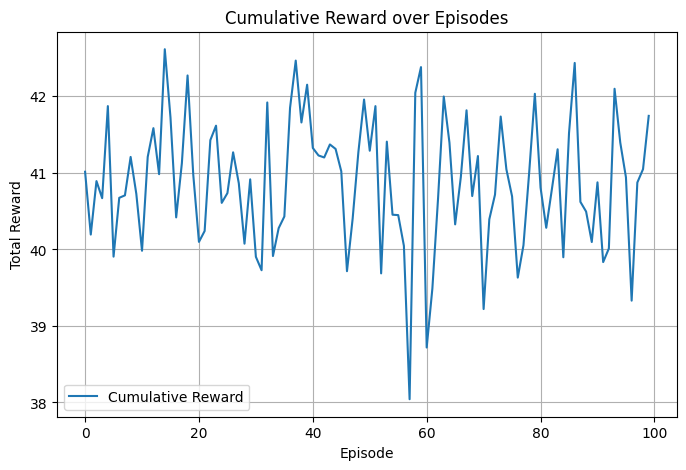

In [22]:
# Plot cumulative reward over episodes
plt.figure(figsize=(8, 5))
plt.plot(episode_rewards, label="Cumulative Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Cumulative Reward over Episodes")
plt.legend()
plt.grid()
plt.show()

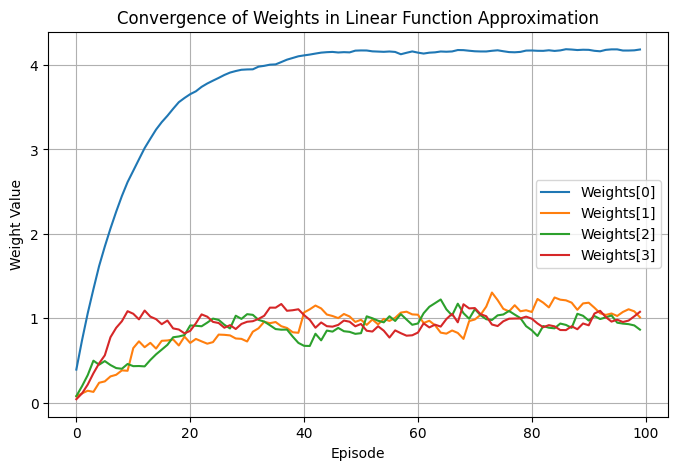

In [23]:
# Plot weights convergence
weights_history = np.array(weights_history)
plt.figure(figsize=(8, 5))
for i in range(weights_history.shape[1]):
    plt.plot(weights_history[:, i], label=f"Weights[{i}]")
plt.xlabel("Episode")
plt.ylabel("Weight Value")
plt.title("Convergence of Weights in Linear Function Approximation")
plt.legend()
plt.grid()
plt.show()

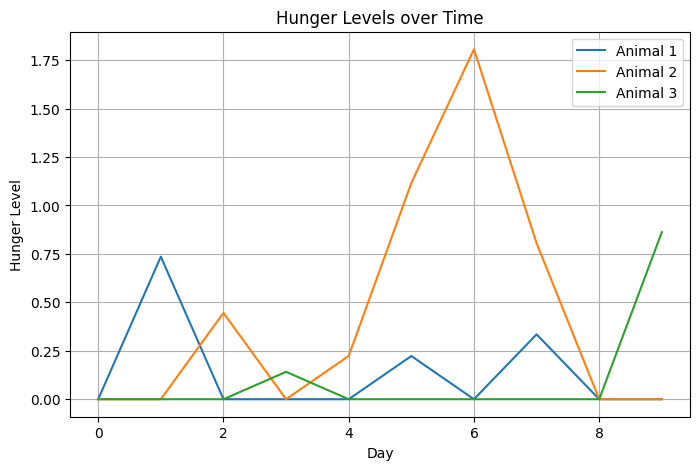

In [24]:
# Simulate policy and plot hunger levels and total utility over time
hunger_history, total_utility = simulate_policy_and_utility(weights)

# Plot hunger levels over time
plt.figure(figsize=(8, 5))
for i in range(hunger_history.shape[1]):
    plt.plot(hunger_history[:, i], label=f"Animal {i+1}")
plt.xlabel("Day")
plt.ylabel("Hunger Level")
plt.title("Hunger Levels over Time")
plt.legend()
plt.grid()
plt.show()

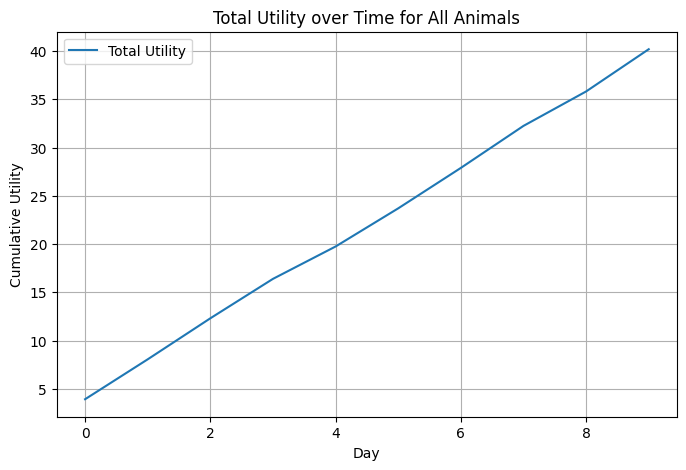

In [26]:
# Plot total utility over time
plt.figure(figsize=(8, 5))
plt.plot(range(T), total_utility, label="Total Utility")
plt.xlabel("Day")
plt.ylabel("Cumulative Utility")
plt.title("Total Utility over Time for All Animals")
plt.legend()
plt.grid()
plt.show()

### Part (E) Answer

<span style="color:red">


The Weights Convergence graph shows us how our system is developing its "decision-making strategy" over time. The weights represent the system learning rules for feeding the animals:

- The baseline rule (weights[0] rising to ~4) tells us that the system has learned there's always a certain level of reward available just from the basic act of feeding
- The animal-specific rules (weights[1:3] hovering around 1) suggest that the system has learned to adjust its expectations based on each animal's hunger level, but not too dramatically
- The stability of these weights after about episode 40 indicates that the system has found a consistent strategy it thinks works well

The Cumulative Reward graph shows us how well this strategy actually performs in practice.

- The rewards mostly stay between 39-42, suggesting our strategy is fairly consistent but not perfect
- The occasional dips (like around episode 60) show times when our strategy didn't work as well, perhaps due to unfortunate random food allocations
- The fact that we don't see a clear upward trend over episodes suggests that while our system has learned a decent strategy (as shown by the converged weights), there might be limitations to how well we can do with random food allocation



In the Hunger Levels Over Time graph:
We see dynamic hunger levels that fluctuate for each animal. Each animal's hunger level changes based on:

- Natural hunger increase (gamma = 1)
- Feeding effect (delta = 0.5 times the food allocated)
- The maximum function keeping hunger non-negative

We can see interesting patterns like Animal 2 getting quite hungry around day 6 (reaching about 1.75), while other animals maintain lower hunger levels on average. This variation comes from our random food allocation strategy.


Total Utility Over Time:
This graph shows cumulative utility (reward) increasing linearly over time. This makes sense mathematically because:


- Each feeding action gives us some positive reward through log(1 + food)
- We're accumulating these rewards over time
- The straight line suggests we're getting consistent rewards each timestep


weights[0] (bias term) represents a base level of reward we expect from any feeding situation
weights[1], weights[2], weights[3] represent how much each animal's hunger level should influence our predictions about future rewards

Looking at the weights convergence graph, we see weights[0] rises quickly to about 4 and stays relatively stable there. This makes sense when we look at our cumulative reward graph, which shows rewards consistently hovering around 40-42 per episode. Since we have 10 time steps per episode, this means we're getting about 4 units of reward per time step on average (40÷10 = 4).

Our reward function uses log(1 + food), and since we're distributing a fixed amount of food (F=10) each time step, there's a fairly consistent baseline reward we can expect, regardless of how that food is distributed among the animals. The bias term has learned to capture this fundamental pattern in our reward structure.

</span>